<a href="https://colab.research.google.com/github/wiktoriaszmidt/lecture1/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

Wczytanie i eksploracja danych

In [48]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("./NY-House-Dataset.csv", sep=';', on_bad_lines='skip')

# Podstawowe informacje
print(df.shape)
df.head()

(4801, 17)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [49]:

df.shape

(4801, 17)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [51]:
print(df.head())
print(df.columns)

                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

Usunięcie duplikatów

In [52]:
df.drop_duplicates(inplace=True)

Usunięcie kolumn niepotrzebnych do analizy predykcji rynku mieszkaniowego

In [53]:
df = df.drop(['BROKERTITLE', 'ADDRESS', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LONG_NAME'], axis=1)


In [54]:
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,"New York, NY 10019",New York,New York County,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,"New York, NY 10065",New York,New York County,40.767224,-73.969856


Sprawdzenie, które kolumny w zbiorze mają brakujące dane

In [55]:
df.isnull().sum()

,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
STATE,0
LOCALITY,0
SUBLOCALITY,0
LATITUDE,0
LONGITUDE,0


Sprawdzenie wartosci odstających

In [56]:
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['PRICE'] >= Q1 - 1.5 * IQR) & (df['PRICE'] <= Q3 + 1.5 * IQR)]


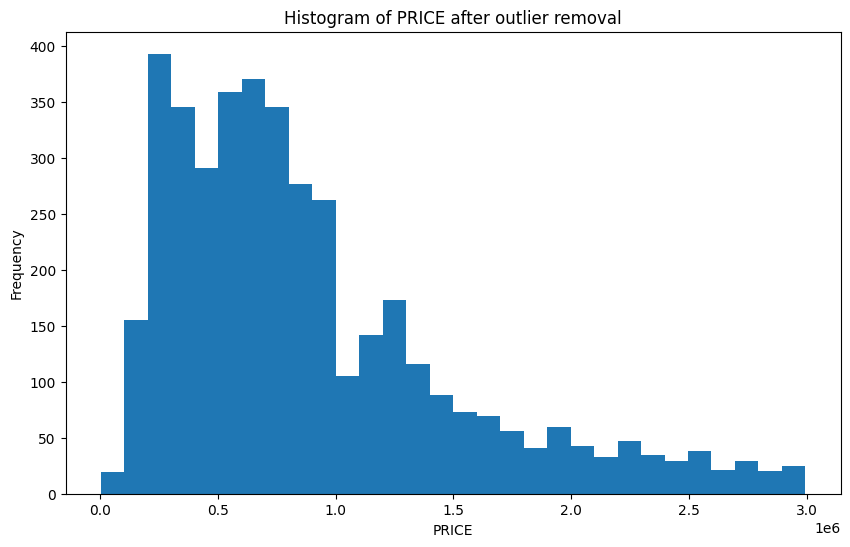

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'], bins=30)
plt.title('Histogram of PRICE after outlier removal')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.show()


Kodowanie zmiennych kategorycznych

In [58]:
le = LabelEncoder()
df['TYPE'] = le.fit_transform(df['TYPE'])
df['STATE'] = le.fit_transform(df['STATE'])
df['LOCALITY'] = le.fit_transform(df['LOCALITY'])
df['SUBLOCALITY'] = le.fit_transform(df['SUBLOCALITY'])

df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,2,315000,2,2.0,1400.000000,204,4,9,40.761255,-73.974483
2,7,260000,4,2.0,2015.000000,296,4,15,40.541805,-74.196109
3,2,69000,3,1.0,445.000000,158,4,11,40.761398,-73.974613
5,7,690000,5,2.0,4004.000000,81,4,8,40.674363,-73.958725
6,2,899500,2,2.0,2184.207862,209,5,10,40.809448,-73.946777


Tworzenie nowych cech

In [59]:
df['PRICE_per_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']
df['TOTAL_ROOMS'] = df['BEDS'] + df['BATH']

df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,PRICE_per_SQFT,TOTAL_ROOMS
0,2,315000,2,2.0,1400.000000,204,4,9,40.761255,-73.974483,225.000000,4.0
2,7,260000,4,2.0,2015.000000,296,4,15,40.541805,-74.196109,129.032258,6.0
3,2,69000,3,1.0,445.000000,158,4,11,40.761398,-73.974613,155.056180,4.0
5,7,690000,5,2.0,4004.000000,81,4,8,40.674363,-73.958725,172.327672,7.0
6,2,899500,2,2.0,2184.207862,209,5,10,40.809448,-73.946777,411.819779,4.0


Skalowanie cech numerycznych

In [60]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'PRICE_per_SQFT', 'TOTAL_ROOMS']
df[num_cols] = scaler.fit_transform(df[num_cols])

Korelacja

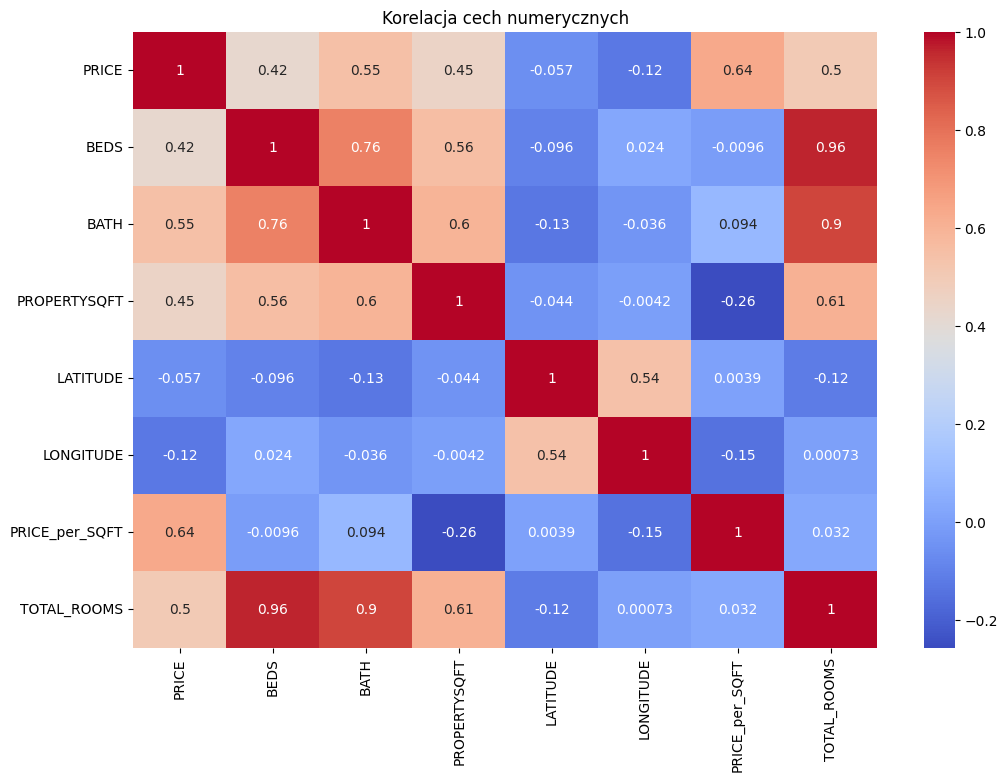

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelacja cech numerycznych')
plt.show()


In [62]:
df.head()


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,PRICE_per_SQFT,TOTAL_ROOMS
0,2,0.104430,0.043478,0.083333,0.056331,204,4,9,0.633396,0.505918,0.075245,0.043478
2,7,0.086050,0.130435,0.083333,0.085941,296,4,15,0.102276,0.103390,0.042988,0.086957
3,2,0.022224,0.086957,0.041667,0.010351,158,4,11,0.633742,0.505683,0.051735,0.043478
5,7,0.229743,0.173913,0.083333,0.181704,81,4,8,0.423098,0.534539,0.057541,0.108696
6,2,0.299751,0.043478,0.083333,0.094088,209,5,10,0.750035,0.556240,0.138041,0.043478


Scatter plot: Powierzchnia vs Cena

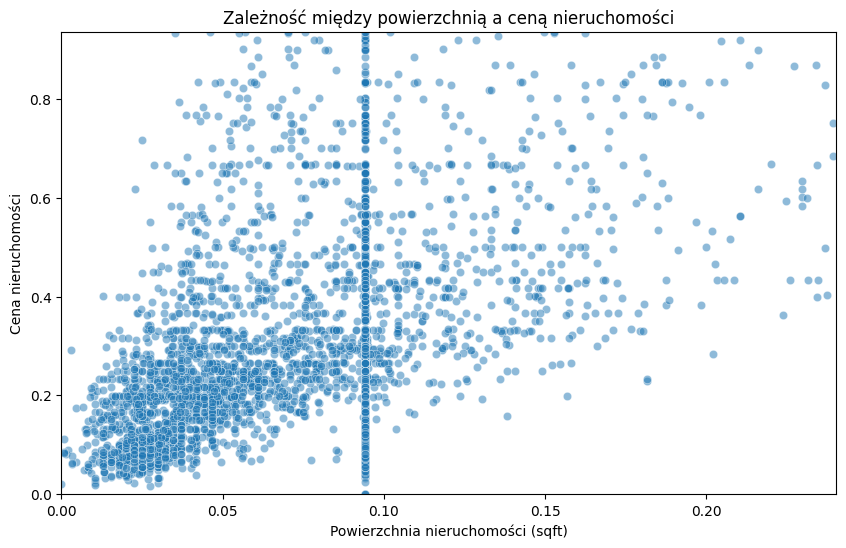

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PROPERTYSQFT'], y=df['PRICE'], alpha=0.5)
plt.xlabel("Powierzchnia nieruchomości (sqft)")
plt.ylabel("Cena nieruchomości")
plt.title("Zależność między powierzchnią a ceną nieruchomości")
plt.xlim(0, df['PROPERTYSQFT'].quantile(0.99))
plt.ylim(0, df['PRICE'].quantile(0.99))
plt.show()

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [74]:
mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = np.sqrt(mse)  # RMSE

Przygotowanie danych X (cechy) i y (cel)

In [75]:
X = df.drop('PRICE_per_SQFT', axis=1)
y = df['PRICE_per_SQFT']

Podział na zbiór treningowy i testowy

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% danych na testowanie
    random_state=42   # Stały podział dla powtarzalności wyników
)

Stworzenie prostego modelu — benchmarku

In [77]:
model = LinearRegression()

Trenowanie modelu na danych treningowych

In [78]:
model.fit(X_train, y_train)

LinearRegression()

Predykcje modelu na danych testowych

In [79]:
y_pred = model.predict(X_test)

Ocena modelu — wyliczenie metryk

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE using NumPy's sqrt
mae = mean_absolute_error(y_test, y_pred)  # MAE
r2 = r2_score(y_test, y_pred)  # R2

 Wyświetlenie wyników benchmarku

In [82]:
print("Benchmark — Model podstawowy (Linear Regression):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Benchmark — Model podstawowy (Linear Regression):
RMSE: 0.0541
MAE: 0.0318
R2 Score: 0.7987


In [84]:
print(df.describe())

              TYPE        PRICE         BEDS         BATH  PROPERTYSQFT  \
count  4059.000000  4059.000000  4059.000000  4059.000000   4059.000000   
mean      4.720867     0.301063     0.092634     0.087395      0.077900   
std       4.253742     0.206872     0.090893     0.054463      0.048992   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.149542     0.043478     0.041667      0.041887   
50%       4.000000     0.249458     0.086957     0.083333      0.092248   
75%       8.000000     0.398497     0.130435     0.098911      0.094088   
max      12.000000     1.000000     1.000000     1.000000      1.000000   

             STATE     LOCALITY  SUBLOCALITY     LATITUDE    LONGITUDE  \
count  4059.000000  4059.000000  4059.000000  4059.000000  4059.000000   
mean    140.590540     4.415127     9.856369     0.509941     0.573680   
std      94.117341     1.601311     5.035049     0.219599     0.192257   
min       0.000000     0.000

1. wartość RMSE = 0.0541 jest stosunkowo mała, co oznacza, że model dobrze przewiduje dane

2. wartość MAE = 0.0318 jest stosunkowo mała, co sugeruje, że model dobrze przewiduje wartości.

3. wartość R² = 0.7987 jest bardzo dobrym wynikiem, ponieważ oznacza, że model wyjaśnia prawie 80% zmienności w danych.

Wykres rzeczywiste vs przewidziane wartości

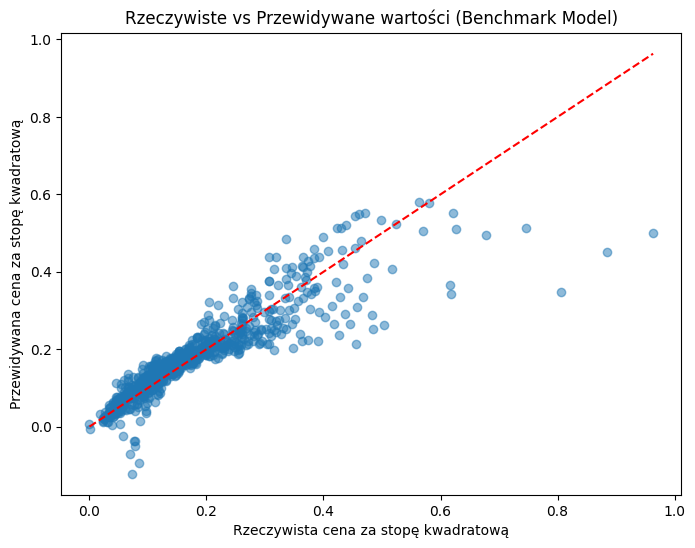

In [83]:
import matplotlib.pyplot as plt

# Wykres prawdziwe vs przewidziane ceny
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Idealna linia
plt.xlabel('Rzeczywista cena za stopę kwadratową')
plt.ylabel('Przewidywana cena za stopę kwadratową')
plt.title('Rzeczywiste vs Przewidywane wartości (Benchmark Model)')
plt.show()

Ten wykres pokazuje jak blisko model przewidział wartości — w większości punkty leżą wzdłuż czerwonej przerywanej linii, co świadczy o tym, że model dobrze przewiduje wartości.